## 3차 과제 - 당뇨병을 예측해보자
- 주제: 데이터 분석 실습(머신러닝)
- 데이터: 피마 인디언 당뇨병 데이터
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
- 사용 라이브러리: numpy, pandas, matplotlib, sklearn


### 1. EDA, 전처리

1.1 분석을 위해 사용될 라이브러리들을 import 하세요.

numpy, pandas, matplotlib, sklearn(train_test_split, accurarcy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, StandardScaler, LogisticRegression)

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

1.2 데이터를 불러오고 타겟 변수('Outcome')에 속한 값들의 비율과(value_counts 활용) 전체 데이터 앞 7개 값을 확인하세요.

In [209]:
train= pd.read_csv('diabetes_pima.csv')

In [210]:
train.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [211]:
train['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

1.3 데이터의 feature 타입과 Null 개수를 확인하세요.

In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [213]:
#결측값 없음
train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

1.4 예측을 위해 데이터를 feature 데이터 셋과 target 데이터 셋으로 나누세요.

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
y=train['Outcome']
train =train.drop(axis=1,columns='Outcome')

1.5 X와 y로 나눈 데이터 셋을 다시 train, test로 나누세요(test_size = 0.3, random_state=123, stratify=y).

In [216]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=123,stratify=y)

1.6 test size는 어느정도로 해야 좋은지 그리고 왜 그래야 하는지 작성하세요.

testsize는 0.1~0.2 가 좋다,너무 적으면 검증데이터가 부족해서 검증이 제대로 되지않고,
너무 많으면 훈련이 충분이 되지않는다.

1.7 startify 값을 설정하는 이유와 언제 주로 사용되는지 서술하세요.

Outcome 의 값인 1과 0이 대략 2:1 비율로 있기 때문에 startify을 사용하여 검증데이터에 타겟값 비율을 2:1을 맞춰주려고 쓴다.
=>타겟값이 골로루 섞여서 훈련이 이상하게 되지않게 하기 위해서 사용

### 2. 예측 및 분석

2.1 성능 평가에 사용될 함수를 만들어보겠습니다. accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score로 구성되어 있으며 이를 한번에 출력할 수 있도록 합니다.

In [217]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score,roc_auc_score

#오차 행렬과 f1,ROC_AUC 를 나타내는 함수
def get_clf_eval(y_test,pred=None, pred_proba = None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy,precision,recall,f1,roc_auc)), recall, f1, roc_auc

2. 위에서 사용한 성능지표인 Confusion Matrix에 대해 설명하세요.

실제 양성(True Positive, TP): 
.실제로 양성인 샘플을 모델이 양성으로 예측한 경우.

실제 음성(True Negative, TN):
.실제로 음성인 샘플을 모델이 음성으로 예측한 경우.

거짓 양성(False Positive, FP): 
실제로는 음성인 샘플을 모델이 양성으로 잘못 예측한 경우. ==>1종오류.

거짓 음성(False Negative, FN):
실제로는 양성인 샘플을 모델이 음성으로 잘못 예측한 경dn. ==>2종오류

2.2 로지스틱 회귀로 예측 후 위에서 만든 clf_eval() 함수를 통해 잘 예측했는지 확인하세요(solver='linear'로 설정, 예측 변수명은 pred, pred_proba).

In [218]:
from sklearn.linear_model import LogisticRegression

In [219]:
lr =LogisticRegression(solver='liblinear')

In [220]:
lr.fit(X_train,y_train)
lr_preds=lr.predict(X_test)
lr_preds_proba = lr.predict_proba(X_test)[:,1]

In [221]:
get_clf_eval(y_test,lr_preds,lr_preds_proba)

오차행렬
[[134  16]
 [ 39  42]]
정확도:0.7619, 정밀도:0.7241, 재현율0.5185, F1:0.6043, AUC:0.8435


2.3 LogisticRegression에서 solver 파라미터의 역할과 어떤 것들이 있고 각각은 무엇을 의미하는지 작성하세요.

iblinear: 작은 데이터셋에 적합하며 이진 분류 문제에 사용. L1, L2 규제(Regularization)를 지원하며, 이는 모델의 과적합을 방지하기 위해 사용. 또한, 클래스가 균형 잡힌 경우에도 잘 작동.

newton-cg: 뉴턴 메소드(Newton's method)를 사용하여 최적화를 수행. 이 방법은 손실 함수의 이차 근사치를 사용하여 최적화를 수행. 이 방법은 손실 함수가 볼록(convex)할 때 잘 작동하지만, 대규모 데이터셋에는 적합하지 않을 수 있다.

lbfgs: 제한된 메모리 Broyden-Fletcher-Goldfarb-Shanno(BFGS)를 사용하여 손실 함수를 최소화. 이 방법은 liblinear와 유사하지만, 더 높은 정확도를 제공.

sag: 'Stochastic Average Gradient descent'의 약어. 이 방법은 확률적 경사 하강법(Stochastic Gradient Descent, SGD)을 기반으로 하며, 반복적으로 모든 훈련 데이터에 대해 경사 하강을 수행하는 것이 아니라 일부 데이터 샘플에 대해 평균화된 경사를 사용하여 최적화를 수행. 큰 데이터셋에 유용하며, 대규모 데이터에 더 빠르게 수렴할 수 있다.

saga: saga는 'SAGA'라는 Stochastic Average Gradient descent의 변형입니다. saga는 lbfgs의 성능을 유지하면서 대규모 데이터셋에 대해 더 효율적으로 작동. 이 알고리즘은 L1 규제와 L2 규제를 모두 지원하며, 다중 클래스 분류에도 사용할 수 있다.

2.4 pred와 pred_proba는 각각 어떤 차이가 있는지 작성하세요.

pred_proba 는 로지스틱 회귀가 0과 1로 예측한 확률을 나타내고 pred 는 로지스틱 회귀 설정값에 따라서 pred_proba를 0과 1로 분류한 값을 표시

2.5 전체 데이터 중 약 65%가 Negative이므로 재현율 성능에 조첨을 맞추겠습니다. 정밀도 재현율 curve를 보고 임계값 별 정밀도 재현율 값의 변화를 확인하기 위해 이를 위한 함수를 작성하겠습니다.

In [222]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[:threshold_boundary], label='recall')
    
    # threshold 값 X축의 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

2.6 작성한 함수를 바탕으로 임계값 별 정밀도와 재현율 값 변화를 확인하세요.

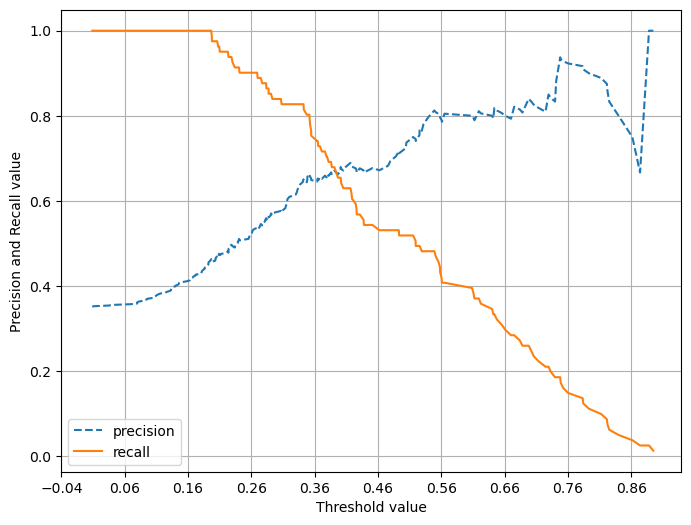

In [223]:
pred_proba_c1 = lr.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_c1)

2.7 그래프를 통해 확인했을 때 Threshold를 0.38정도로 설정했을 때 recall과 precision이 어느정도 균형이 맞음을 알 수 있습니다. 그러나 두 지표 모두 0.7 이하로 낮은 값이기에 다시 확인하도록 하겠습니다. 먼저 describe() 함수를 통해 개별 feature에 대한 분포도를 확인하세요.

In [224]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


2.8 위에서 확인해봤을 때 min 값이 0으로 되어 있는 feature가 다수 존재합니다. Glucose(포도당 수치), BMI 지수가 0인 것은 말이 안 되므로 이들을 평균값으로 대체하세요.

In [225]:
### Glucose, BloodPressure, SkinThickness, Insulin, BMI에 대해 평균값으로 대체
change_list=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [226]:
for col in change_list:
    train.replace(0, train[col].mean(), inplace=True)

In [227]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,21.318090,121.681605,74.614985,56.269608,138.672597,33.724140,0.471876,33.240885
std,41.064012,30.436016,15.770971,42.801250,86.769787,12.562976,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,120.670898,27.500000,0.243750,24.000000
50%,5.000000,117.000000,73.000000,35.000000,120.894531,32.400000,0.372500,29.000000
75%,9.000000,140.250000,82.000000,120.894531,127.250000,36.825000,0.626250,41.000000
max,120.894531,199.000000,122.000000,120.894531,846.000000,120.894531,2.420000,81.000000


2.9 이후 대체한 feature들에 대해 feature scaling을 진행하겠습니다. 모두 numeric feature이므로 X에 대해 StandardScaler를 일괄 적용하세요.

In [228]:
from sklearn.preprocessing import StandardScaler

In [229]:
ss=StandardScaler()
train=ss.fit_transform(train)

In [230]:
train

array([[-0.37327264,  0.86527574, -0.16591809, ..., -0.00988789,
         0.46849198,  1.4259954 ],
       [-0.49511311, -1.20598931, -0.54661185, ..., -0.56744381,
        -0.36506078, -0.19067191],
       [-0.32453645,  2.01597855, -0.67350977, ..., -0.8302916 ,
         0.60439732, -0.10558415],
       ...,
       [-0.39764073, -0.02240928, -0.16591809, ..., -0.59930414,
        -0.68519336, -0.27575966],
       [-0.49511311,  0.14197684, -0.92730561, ..., -0.28866585,
        -0.37110101,  1.17073215],
       [-0.49511311, -0.94297153, -0.29281601, ..., -0.26477059,
        -0.47378505, -0.87137393]])

2.10 feature scaling은 왜 사용하고 어떤 것들이 있는지 작성하세요.

데이터의 특성들을 일정한 범위나 표준화된 분포로 조정하여 모델의 성능을 향상시키고 수렴 속도를 높이는 데 도움을 주기위해서. 

Min-Max Scaling : 데이터를 [0, 1] 범위로 스케일링
Standardization: 데이터를 평균이 0이고 표준편차가 1인 분포로 변환
Robust Scaling: 이상치에 덜 민감한 스케일링 방법으로, 중앙값(median)과 IQR(interquartile range)을 사용

2.11 다시 에측하기에 앞서 위에서 scaling을 통해 변경된 X_scaled를 활용해 다시 train_test_split을 진행하세요(함수 파라미터 동일).

In [231]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.3,random_state=123,stratify=y)

2.12 로지스틱 회귀로 앞서 진행한 것과 동일하게 진행하세요.

In [232]:
lr.fit(X_train,y_train)
lr_preds=lr.predict(X_test)
lr_preds_proba = lr.predict_proba(X_test)[:,1]

In [233]:
get_clf_eval(y_test,lr_preds,lr_preds_proba)

오차행렬
[[131  19]
 [ 40  41]]
정확도:0.7446, 정밀도:0.6833, 재현율0.5062, F1:0.5816, AUC:0.8113


### 3. 자유 분석
성능을 높일 수 있는 방법들을 활용해 예측을 진행하세요.

In [234]:
train= pd.read_csv('diabetes_pima.csv')
y=train['Outcome']

In [235]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [236]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [237]:
#비율표시 해주는 함수코드
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

In [238]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

In [239]:
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [240]:
for col in train.columns:
    unique_values = train[col].unique()
    unique_count = len(unique_values)
    print(f" {col}  {unique_count} 개.")

 Pregnancies  17 개.
 Glucose  136 개.
 BloodPressure  47 개.
 SkinThickness  51 개.
 Insulin  186 개.
 BMI  248 개.
 DiabetesPedigreeFunction  517 개.
 Age  52 개.
 Outcome  2 개.


C:\Users\yeonn\AppData\Local\Temp\ipykernel_18344\2709869995.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

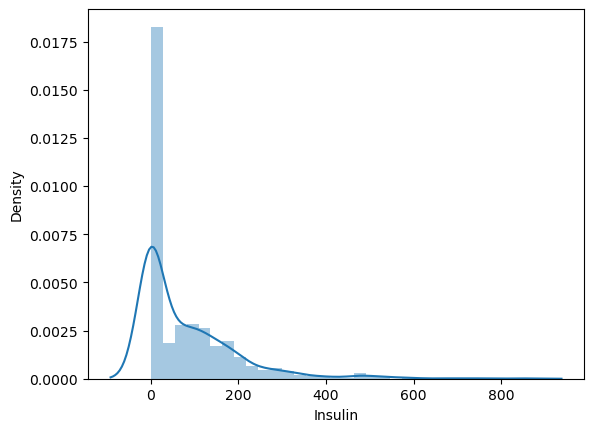

In [241]:
sns.distplot(train['Insulin'])

In [242]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_filtered

In [243]:
Outcome=train[['Outcome']]

In [244]:
Outcome

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [245]:
for col in change_list:
    train[col].replace(0, train[col].mean(), inplace=True)

In [246]:
train.drop(axis=1,columns='Outcome',inplace=True)
train = remove_outliers(train,train.columns )

In [247]:
for col in train.columns:
    train[col].fillna(train[col].mean(), inplace=True)

In [248]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627000,50.0
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351000,31.0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672000,32.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,0.429832,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171000,63.0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340000,27.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245000,30.0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349000,47.0


In [249]:
train = pd.concat([train, Outcome], axis=1)

In [250]:
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,79.799479,33.6,0.627000,50.0,1
1,1.0,85.0,66.0,29.000000,79.799479,26.6,0.351000,31.0,0
2,8.0,183.0,64.0,20.536458,79.799479,23.3,0.672000,32.0,1
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167000,21.0,0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,0.429832,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171000,63.0,0
764,2.0,122.0,70.0,27.000000,79.799479,36.8,0.340000,27.0,0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245000,30.0,0
766,1.0,126.0,60.0,20.536458,79.799479,30.1,0.349000,47.0,1


In [251]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['Outcome'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [252]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',                  # 포인트플롯 색상
                        )                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Outcome 1 Ratio(%)')
    

In [253]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

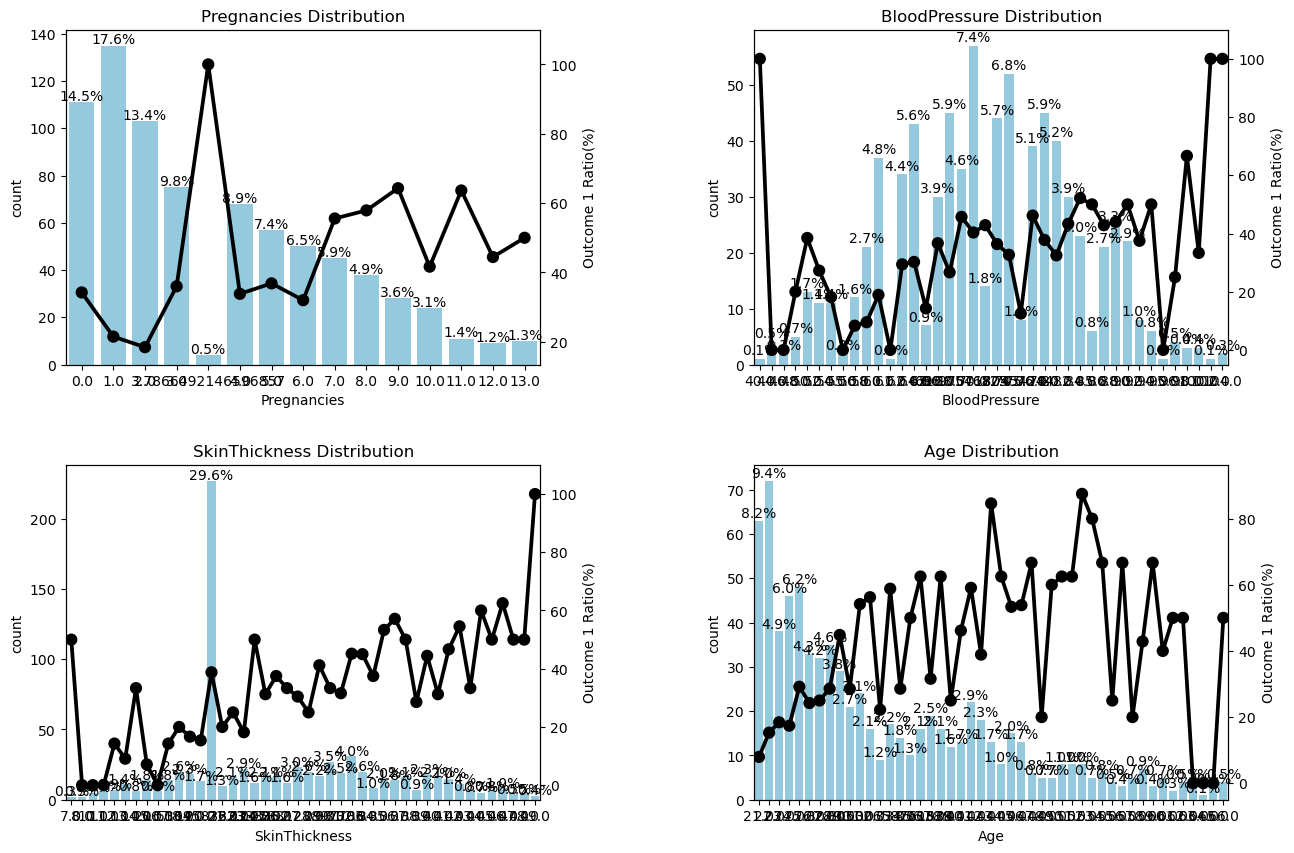

In [254]:
small_value=['Pregnancies','BloodPressure','SkinThickness','Age']
large_value=['Glucose','Insulin','BMI','DiabetesPedigreeFunction']
plot_cat_dist_with_true_ratio(train, small_value, 
                              num_rows=2, num_cols=2, size=(15, 10))

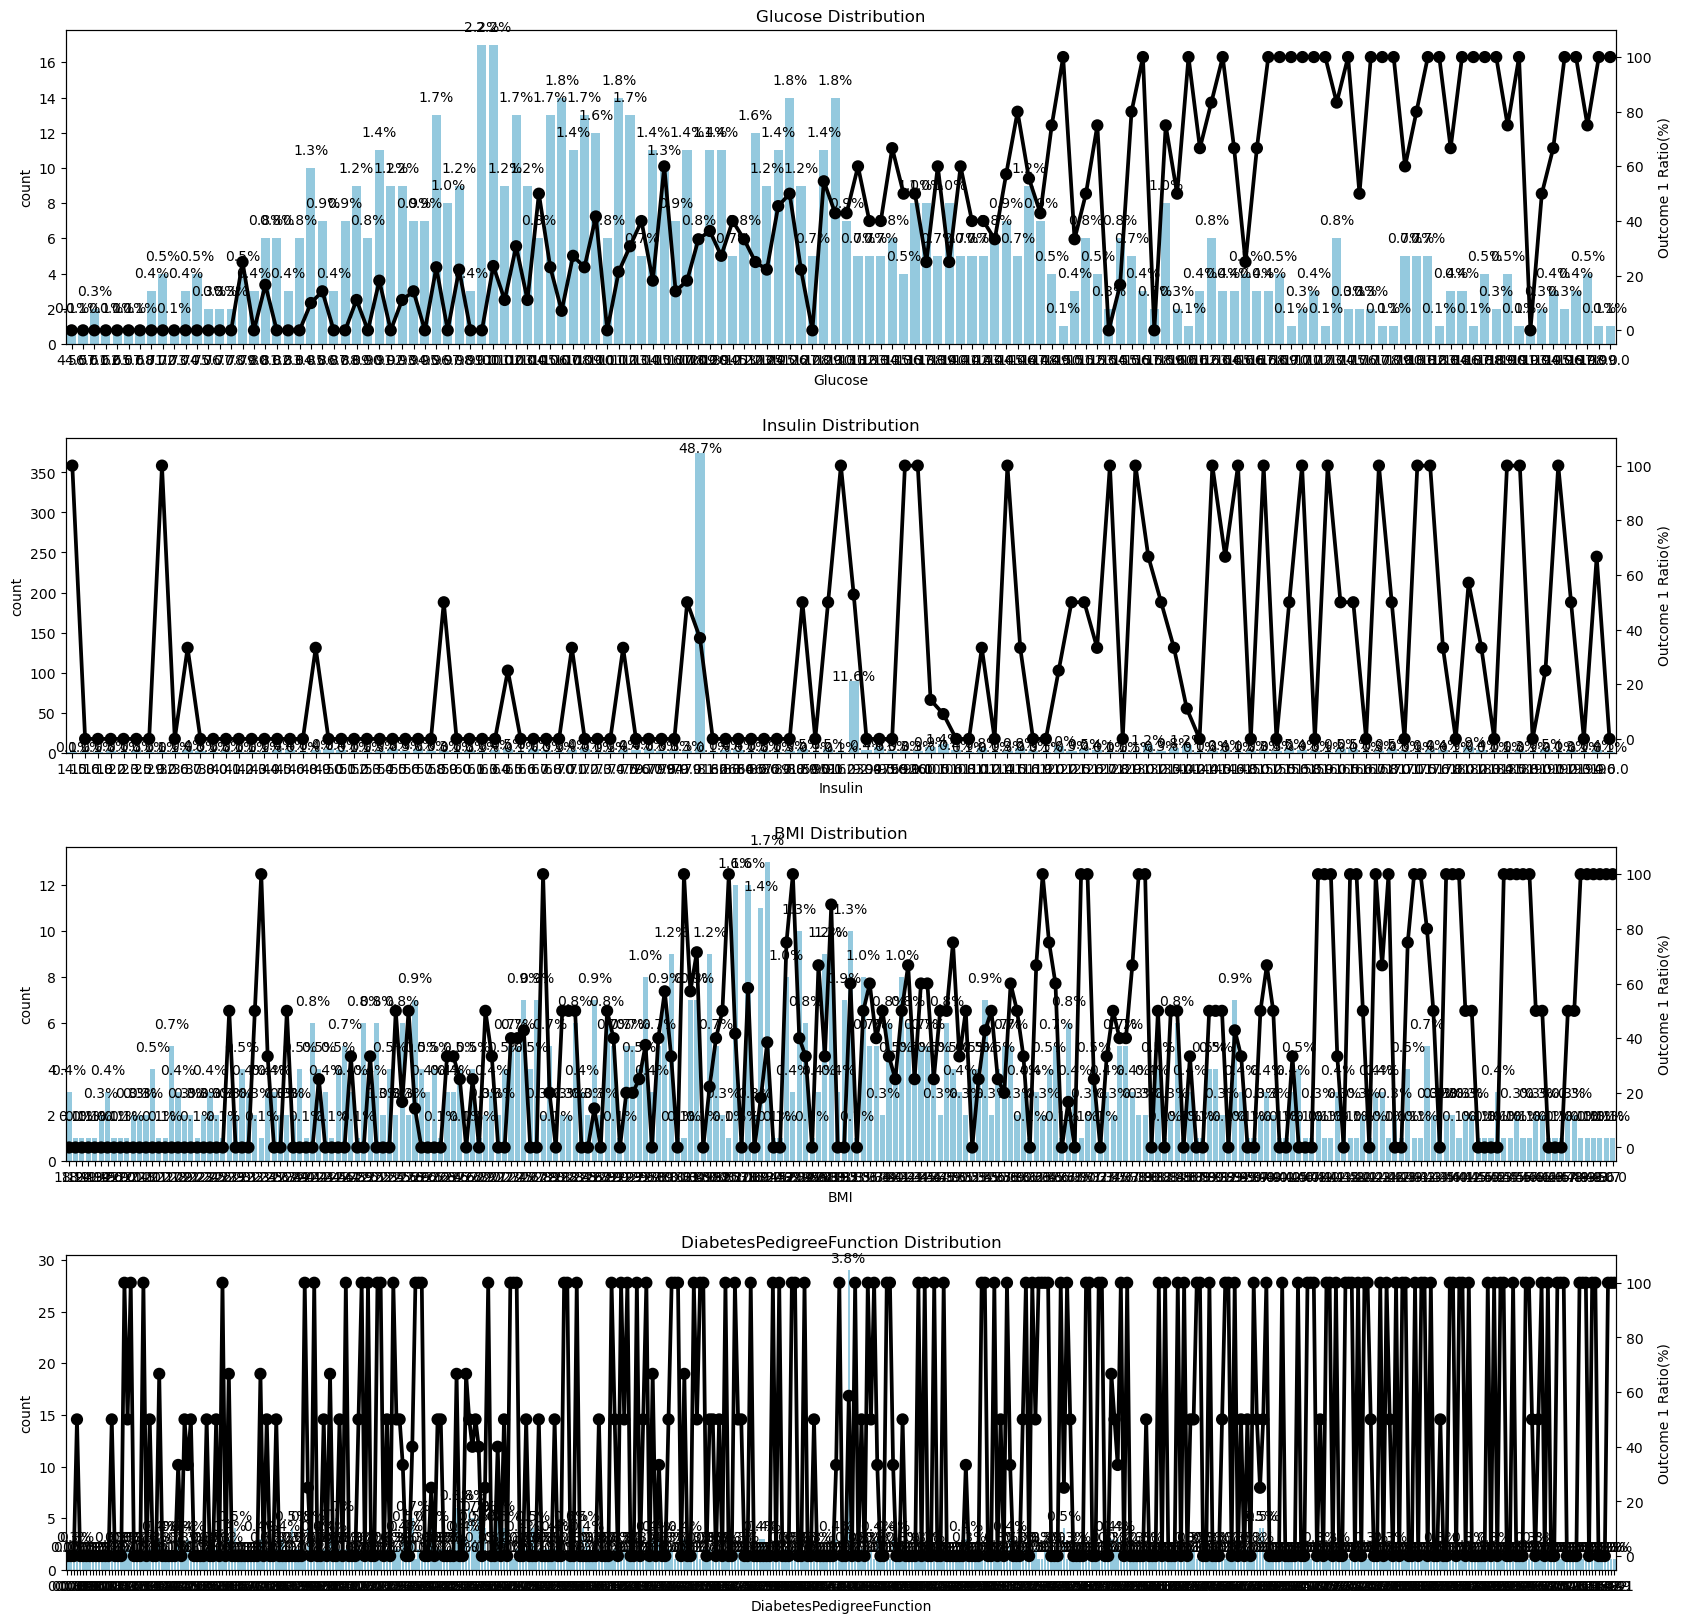

In [255]:
plot_cat_dist_with_true_ratio(train, large_value, 
                              num_rows=4,num_cols=1, size=(20, 20))

In [256]:
train.drop(axis=1,columns='Insulin',inplace=True)

In [257]:
y = train['Outcome']

In [258]:
train.drop(axis=1,columns='Outcome',inplace=True)

In [259]:
train=ss.fit_transform(train)

In [270]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(train, y,
                                                      test_size=0.3,
                                                      stratify=y,
                                                      random_state=143)

In [271]:
lr.fit(X_train2,y_train2)
lr_preds2= lr.predict(X_test2)
lr_preds_proba2= lr.predict_proba(X_test2)[:,1]

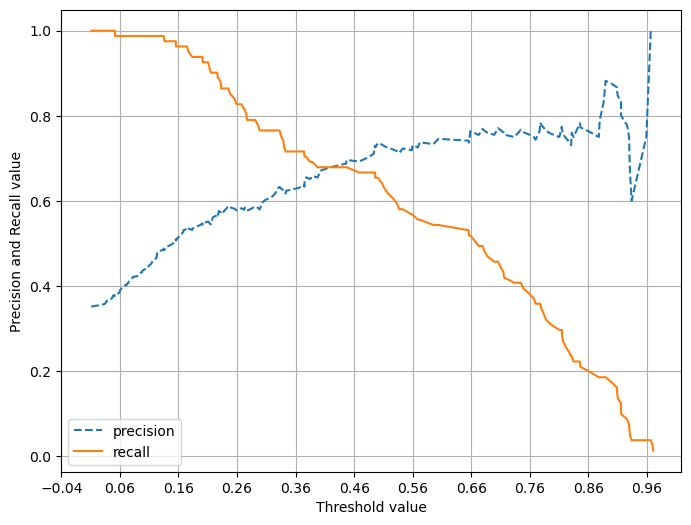

In [272]:
precision_recall_curve_plot(y_test2, lr_preds_proba2)

In [273]:
get_clf_eval(y_test,lr_preds,lr_preds_proba)
get_clf_eval(y_test2,lr_preds2,lr_preds_proba2)

오차행렬
[[131  19]
 [ 40  41]]
정확도:0.7446, 정밀도:0.6833, 재현율0.5062, F1:0.5816, AUC:0.8113
오차행렬
[[131  19]
 [ 28  53]]
정확도:0.7965, 정밀도:0.7361, 재현율0.6543, F1:0.6928, AUC:0.8442


전체적으로 성능향상..!